In [15]:
import pandas as pd
import numpy as np

 # Loading the data

In [4]:
control_df = pd.read_csv('data/marketing-data/control_group.csv', sep=';').dropna()
test_df = pd.read_csv('data/marketing-data/test_group.csv', sep=';').dropna()
# In practice, we would deal with missing values. The purpose of this tutorial is to show how to peform AB Testing. Not data imputation.

print(f'Control data shape: {control_df.shape}, Test data shape: {test_df.shape}')

Control data shape: (29, 10), Test data shape: (30, 10)


In [5]:
test_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [7]:
control_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0


In [8]:
control_df.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2304.068966,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,363.534822,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1962.000000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2319.000000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2544.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [9]:
test_df.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


# Hypothesis Testing

## Steps 

1. Identifying the parameter of interest and its meaning in the context of your problem.
2. Define your null (H0) and alternative (H1) hypothesis.
3. Choose a statistical test.
4. Choose an α significance level. Typical levels are 0.01, 0.05 or 0.10. 
5. Perform your statistical test. Get an observed test statistic or a p-value.
6. Make a decision to reject H0 in favour of H1 if the observed test statistic is in the critical region or the p-value ≤ α. Otherwise do not reject H0. 
7. Make an applied decision to the context of your problem.

## Set up

1. Say we are intrested in the number of purchases made and we want to compare the peformance of the new campaign. In this case we can choose the parameter of intrest to be the mean number of purchases per group.

Let $\mu_c$ mean the average purchaces made from the control group, and $\mu_t$ be the average purchaces made from the test group. 

We want to know, if there is statistical difference between the average number of purchaces between the test and control campaign.

2. Definng the null $H_0$ and alternative $H_1$ hypothesis.

$H_0 : \mu_c=\mu_t$ --- There is no difference in mean purchasees between campaigns.

$H_1 : \mu_c\neq\mu_t$ --- There is a statistical difference in mean purchases between campaigns.

3. Condact some EDA. Check for normality and homogeneity of variance. choose a statistical test.

4. Choosing significance level. Lets choose $\alpha = 0.05$

Shapiro-Wilk Test Results:
Control:  ShapiroResult(statistic=0.9381418824195862, pvalue=0.08964364230632782), 
Test:  ShapiroResult(statistic=0.9181894659996033, pvalue=0.024077769368886948)


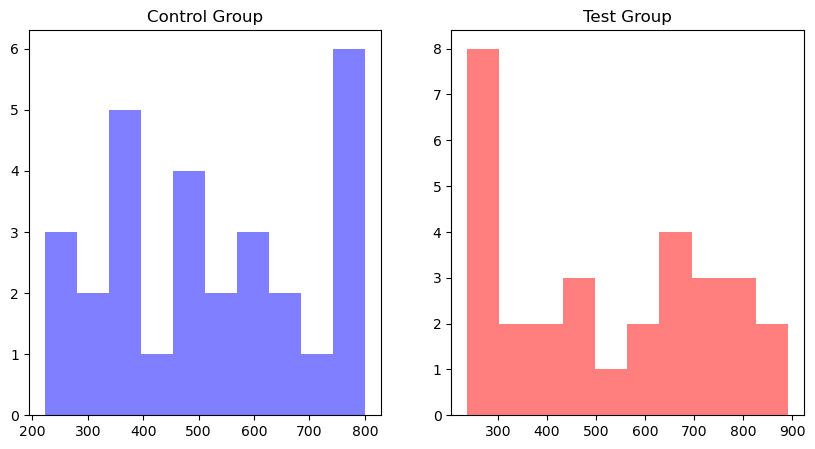

Levene's Test Result: LeveneResult(statistic=1.230260648051359, pvalue=0.2720142278811527)


In [16]:
from scipy.stats import shapiro, levene, ttest_ind
import matplotlib.pyplot as plt

purchase_control = control_df['# of Purchase'].dropna()
purchase_test = test_df['# of Purchase'].dropna()

# Step 1 -  Check for Normality
# Shapiro-Wilk Test
# H0: The samples come from a normal distribution. H1: The samples dont come from a normal distribution. Choose alpha = 0.05.
shapiro_control = shapiro(purchase_control)
shapiro_test = shapiro(purchase_test)
print(f"Shapiro-Wilk Test Results:\nControl:  {shapiro_control}, \nTest:  {shapiro_test}")

# Histogram for visual inspection
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(purchase_control, alpha=0.5, color='blue', label='Control')
plt.title('Control Group')
plt.subplot(1, 2, 2)
plt.hist(purchase_test, alpha=0.5, color='red', label='Test')
plt.title('Test Group')
plt.show()

# Step 2 - Check for Homogeneity of Variances
# Levene's Test
# H0: Groups have equal variance, H1: Groups have different variance. Choose alpha = 0.05
levene_result = levene(purchase_control, purchase_test)
print("Levene's Test Result:", levene_result)

Based on these results:
1. Shapiro-Wilk Test for Normality: Both P-values from the test and control group are less than 0.05 (0.09 and 0.02) respectivly. Thus we reject H0 and conclude the data suggests the samples dont from a normal distribution.
2. Levene's Test for Homogeneity of Variance: P-value of 0.27 which is greater than any reasonable significance level and the one we chose. Thus we dont reject H0, and conclude the groups have equal variance.